[[1.         0.        ]
 [1.         0.11111111]
 [1.         0.22222222]
 [1.         0.33333333]
 [1.         0.44444444]
 [1.         0.55555556]
 [1.         0.66666667]
 [1.         0.77777778]
 [1.         0.88888889]
 [1.         1.        ]]


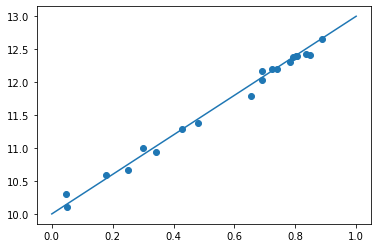

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터셋을 적당히 생성
# 1차원 입력 (bias를 포함 = 2차원) -> 1차원 출력

N = 20
x = np.random.rand(N) #(N, ) 벡터
y = 10 + 3*x + 1e-1*np.random.randn(N)

X = np.hstack( [ np.ones((N,1)) , x.reshape(N,1) ] ) #데이터셋 디자인매트릭스

theta = np.array([10,3])    # 정답 #2x1
# print(theta.shape) => (2,) # 1x2(2차원행렬)이 아님. 벡터(1차원)임

X_plot = np.hstack( [np.ones((10,1)), np.linspace(0,1,10).reshape(10,1)] )  #plot을 위해 쪼개놓은 디자인매트릭스 #10x2
y_plot = X_plot.dot(theta) #plot을 위한 y # 10x2 dot 2x1
print(X_plot)

plt.figure()
plt.scatter(x,y)   # 실제 데이터. 점으로 찍힘
plt.plot(X_plot[:,1] , y_plot) #전체 입력을 10개의 구간으로 쪼개고, 주어진 세타에 대한 각각의 예측값을 이은 직선

[10.04051755  2.902195  ]
[[1.         0.04722361]
 [1.         0.24946122]
 [1.         0.80600898]
 [1.         0.78283112]
 [1.         0.83659819]
 [1.         0.17688796]
 [1.         0.48161998]
 [1.         0.79258357]
 [1.         0.68942216]
 [1.         0.42709176]
 [1.         0.29835134]
 [1.         0.34238842]
 [1.         0.72426542]
 [1.         0.84714514]
 [1.         0.8890206 ]
 [1.         0.6901719 ]
 [1.         0.04901526]
 [1.         0.73990025]
 [1.         0.8009684 ]
 [1.         0.65331542]]
[10.17756967 10.76450266 12.37971277 12.31244611 12.46848864 10.5538809
 11.43827265 12.34074961 12.0413551  11.28002112 10.90639132 11.03419552
 12.14247703 12.49909792 12.62062869 12.043531   10.18276938 12.18785234
 12.36508402 11.93656629]
0.11005662956232809


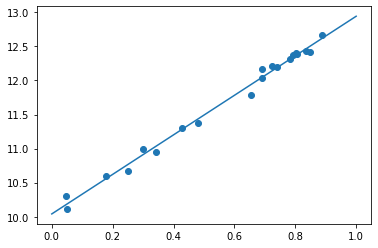

In [4]:
# normal equation
# = closed form으로 해를 구함
# 1. theta <- 주어진 데이터(X, y)로 구함
# 2. 구한 theta에 대해서 예측을 수행
# 3. 그 예측에 대해서 SSE를 계산
# 4. 현재 예측한 theta를 가지고 plot을 해봄
# -----------------------------------------------------------


# 1. theta <- 주어진 데이터(X, y)로 구함
theta = np.linalg.inv( X.T.dot(X) ).dot(X.T.dot(y)) #np.linalg.inv : 역행렬 구해주는 함수  *역행렬이랑 전치행렬이랑 아예 다름
# (X^T X)^{-1} X^T y
print(theta)

# 2. 구한 theta에 대해서 예측을 수행
# 학습 데이터에 들어있는 정답 출력 = y
# (실제 입력 X) x (방금 구한 theta) = y_predict
y_predict = X.dot(theta)
print(X)
print(y_predict)

# 3. 그 예측에 대해서 SSE를 계산
# SSE cost = sum [ (정답 y) - (예측 y_predict) ]^2
SSE = np.sum( (y - y_predict)**2 )
print(SSE)

# 4. 현재 예측한 theta를 가지고 plot을 해봄
y_plot = X_plot.dot(theta)

plt.figure()
plt.scatter(X[:,1], y) # 주어진 학습 데이터를 점으로 찍음
plt.plot(X_plot[:,1], y_plot) # 전체 입력을 잘게 쪼개서, 전체 예측을 구함

[0.40842635 0.72278972] 2368.665000160329
[4.75486634 3.24907184] 518.2984918788286
[6.79056428 4.39132327] 119.28318804755185
[7.75327975 4.8918293 ] 32.98130140314517
[8.21755172 5.09512068] 14.069184749834934
[8.45007237 5.16110314] 9.690463250970117
[8.57464069 5.16398549] 8.456448712003649
[8.64872888 5.13819898] 7.912819353675648
[8.69902206 5.09971167] 7.530216030348559
[8.73791478 5.05592188] 7.194043753202511


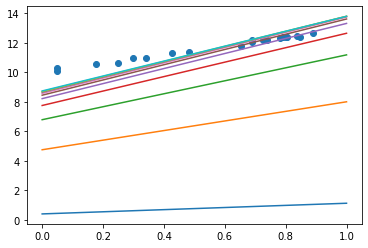

In [5]:
# batch gradient descent
# theta <- 랜덤으로 하나 뽑아서 초기화
# epoch을 반복
## y_predict <= theta, X
## gradient  <= y_predict, y, X <= 2* X.T (y_predict - y)
## gradient descent :   update    <= theta - eta*gradient

# hyperparameter: learning rate, maximum epoch
eta = 0.01
maxEpoch = 10

# theta를 랜덤으로 초기화 한번
theta = np.random.randn(2)

#출발 전, 실제 데이터 그려놓기
plt.figure()
plt.scatter(X[:,1], y)

for epoch in range(maxEpoch):
    
    y_predict = X.dot(theta)
    
    # SSE cost가 점점 작아지는지 확인
    SSE = np.sum( (y - y_predict)**2 )
    print(theta, SSE)
    # 그래프로 확인하고 싶으면 SSE=[] 만들어놓고 append로 추가해서 plot
    
    # 예측값이 점점 정답에 가까워지는지 확인 
    y_plot = X_plot.dot(theta)  # plot용 출력 = 전체 입력값에 대한 예측값 (구간을 쪼개서 구하고 선으로 이음)
    plt.plot(X_plot[:,1], y_plot) # 맨 아래 파란직선이 처음 초기화된 theta 값 => 점점 수렴
    
    #메인파트
    grad = 2*X.T.dot(y_predict - y)  #gradient 벡터
    #        DxN         Nx1        = Dx1
    theta = theta - eta*grad

    


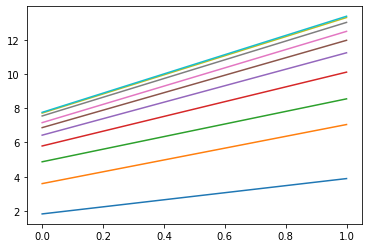

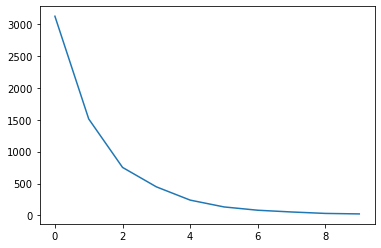

In [10]:
# stochastic gradient descent
# batch gradient      <= 2 * X.^T     * (y_predict - y)                    : 행렬x벡터      
# stochastic gradient <= 2 * X[n,:].T * (y_predict[n] - y[n])              : 벡터x스칼라    => 결과 dimension은 똑같음
#                            랜덤샘플       가중치(스칼라)
# hyperparameter: learning rate, maximum epoch
eta = 0.1
maxEpoch = 10

# theta를 랜덤으로 초기화 한번
theta = np.random.randn(2)
SSE = []

for epoch in range(maxEpoch):
    
    y_predict = X.dot(theta)
    
    SSE.append(np.sum( (y - y_predict)**2 ))
    
    n = np.random.randint(0, N, 1)                            #랜덤샘플 (0~N 범위 중 1개) 의 index
    grad = 2 * X[n,:].reshape(2) * (y_predict[n] - y[n])     #여기만 바뀐거임  #스칼라곱이니까 dot아니고 *써야됨!!  #reshape(2.1) : 행렬, reshape(2) : 벡터
    theta = theta - eta*grad    
    
    y_plot = X_plot.dot(theta)  # plot용 출력 = 전체 입력값에 대한 예측값 (구간을 쪼개서 구하고 선으로 이음)
    plt.plot(X_plot[:,1], y_plot) # 맨 아래 파란직선이 처음 초기화된 theta 값 => 점점 수렴

plt.figure()
plt.plot(SSE)

In [ ]:
# 다차원 입력인 경우
# design matrix X = (N, D)
# sample: N, dimension: D


# ex) 3차원 입력인 경우

N = 20
x1 = np.random.rand(N) #(N, ) 벡터
x2 = np.random.rand(N)
y = 10 + 3*x1 + 5*x2 + 1e-1*np.random.randn(N)

# 20x3
X = np.hstack( [ np.ones((N,1)) , x1.reshape(N,1) , x2.reshape(N,1) ] ) #데이터셋 디자인매트릭스

# 여기까지만 다르지 나머지 식은 디멘션이 딱딱 맞아 들어가기 때문에 아무 문제없이 성립한다
# 단, 그래프는 달라짐. (x1,x2) => y를 세로축, 3D plot   모든 예측값 plot => 평면 
# 4차원부터는 못그림